In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
## cufflinks - transforming data for iplot
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)



In [2]:
cov_cnf=pd.read_csv(r"C:\Users\Lenovo\Downloads\time_series_covid19_confirmed_global.csv")

In [3]:
cov_cnf.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,989,989,1005,1005,1024,1024,1045,1045,1045,1060
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1879,1906,1935,1966,2015,2044,2068,2134,2171,2222


In [4]:
#renaming some of the columns
cov_cnf.rename({'Province/State':'State','Country/Region':'Country'},axis=1,inplace=True)
cov_cnf.head(20)

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,989,989,1005,1005,1024,1024,1045,1045,1045,1060
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1879,1906,1935,1966,2015,2044,2068,2134,2171,2222
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,93,93,93,93,94,94,94,94,94,94
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,289100,294569,299126,305966,312659,320884,329043,336802,342154,350867
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,41495,41663,41701,41846,42056,42319,42477,42616,42792,42825
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,3950,3957,3959,3966,3971,3972,3981,3985,3988,3991


In [5]:
cov_country=cov_cnf.drop(['State','Lat','Long'],axis=1)

In [49]:
cov_country.head(20)

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054
1,Albania,0,0,0,0,0,0,0,0,0,...,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605
2,Algeria,0,0,0,0,0,0,0,0,0,...,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858
3,Andorra,0,0,0,0,0,0,0,0,0,...,989,989,1005,1005,1024,1024,1045,1045,1045,1060
4,Angola,0,0,0,0,0,0,0,0,0,...,1879,1906,1935,1966,2015,2044,2068,2134,2171,2222
5,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,93,93,93,93,94,94,94,94,94,94
6,Argentina,0,0,0,0,0,0,0,0,0,...,289100,294569,299126,305966,312659,320884,329043,336802,342154,350867
7,Armenia,0,0,0,0,0,0,0,0,0,...,41495,41663,41701,41846,42056,42319,42477,42616,42792,42825
8,Australia,0,0,0,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
9,Australia,0,0,0,0,3,4,4,4,4,...,3950,3957,3959,3966,3971,3972,3981,3985,3988,3991


In [7]:
cov_fnc_country=cov_country.groupby(['Country']).sum()

In [47]:
cov_fnc_country.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054
Albania,0,0,0,0,0,0,0,0,0,0,...,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605
Algeria,0,0,0,0,0,0,0,0,0,0,...,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858
Andorra,0,0,0,0,0,0,0,0,0,0,...,989,989,1005,1005,1024,1024,1045,1045,1045,1060
Angola,0,0,0,0,0,0,0,0,0,0,...,1879,1906,1935,1966,2015,2044,2068,2134,2171,2222
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,93,93,93,93,94,94,94,94,94,94
Argentina,0,0,0,0,0,0,0,0,0,0,...,289100,294569,299126,305966,312659,320884,329043,336802,342154,350867
Armenia,0,0,0,0,0,0,0,0,0,0,...,41495,41663,41701,41846,42056,42319,42477,42616,42792,42825
Australia,0,0,0,0,4,5,5,6,9,9,...,23287,23558,23773,23989,24236,24407,24602,24811,24915,25053


In [9]:
#total no. of confirmed cases all over the world
cov_fnc_country.iloc[:,-1].sum()

23647377

In [10]:
#top 10 countries which has more no. of confirmed cases.
cov_fnc_country.sort_values(by=cov_fnc_country.columns[-1],ascending=False).head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20
Country,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,5,5,7,...,5361165,5403213,5438325,5482416,5529824,5573847,5622540,5667112,5701679,5739724
Brazil,0,0,0,0,0,0,0,0,0,0,...,3317096,3340197,3359570,3407354,3456652,3501975,3532330,3582362,3605783,3622861
India,0,0,0,0,0,0,0,0,1,1,...,2589952,2647663,2702681,2767253,2836925,2905825,2975701,3044940,3106348,3167323
Russia,0,0,0,0,0,0,0,0,0,2,...,915808,920719,925558,930276,935066,939833,944671,949531,954328,959016
South Africa,0,0,0,0,0,0,0,0,0,0,...,583653,587345,589886,592144,596060,599940,603338,607045,609773,611450
Peru,0,0,0,0,0,0,0,0,0,0,...,516296,525803,535946,541493,549321,558420,567059,576067,585236,594326
Mexico,0,0,0,0,0,0,0,0,0,0,...,517714,522162,525733,531239,537031,543806,549734,556216,560164,563705
Colombia,0,0,0,0,0,0,0,0,0,0,...,456689,468332,476660,489122,502178,513719,522138,522138,541139,551688
Spain,0,0,0,0,0,0,0,0,0,0,...,342813,342813,359082,364196,370867,377906,386054,386054,386054,405436


In [11]:
sns.set_style('darkgrid')
cov_fnc_country.sort_values(by=cov_fnc_country.columns[-1],ascending=False).head(10).transpose().iplot(title='Times-series data')

In [12]:
cov_fnc_country.loc['India'].transpose().iplot()

In [13]:
cov_fnc_country.loc['India'].diff().iplot()

In [14]:
import folium

In [15]:
world_map=folium.Map(location=[10,0],zoom_start=2,max_zoom=8,min_zoom=1,width='100%',tiles='CartoDB dark_matter')
for i in range(0,len(cov_cnf)):
    folium.Circle(location=[cov_cnf.iloc[i]['Lat'],cov_cnf.iloc[i]['Long']],radius=(int(np.log(cov_cnf.iloc[i,-1]+1.00001)))*30000,color='red',fill=True).add_to(world_map)
world_map

In [16]:
death_cases=pd.read_csv(r'C:\Users\Lenovo\Downloads\time_series_covid19_deaths_global.csv')
death_cases.rename({'Province/State':'State','Country/Region':'Country'},axis=1,inplace=True)

In [17]:
death_country=death_cases.drop(['State','Lat','Long'],axis=1)

In [18]:
death_fnc_country=death_country.groupby(['Country']).sum()

In [19]:
death_fnc_country.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1370,1375,1375,1375,1375,1385,1385,1385,1387,1389
Albania,0,0,0,0,0,0,0,0,0,0,...,225,228,230,232,234,238,240,245,250,254
Algeria,0,0,0,0,0,0,0,0,0,0,...,1360,1370,1379,1391,1402,1411,1418,1424,1435,1446
Andorra,0,0,0,0,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
Angola,0,0,0,0,0,0,0,0,0,0,...,86,88,88,90,92,93,94,94,96,100


In [20]:
#total no. of death cases
death_fnc_country.iloc[:,-1].sum()

813022

In [21]:
recovered_cases=pd.read_csv(r'C:\Users\Lenovo\Downloads\time_series_covid19_recovered_global.csv')
recovered_cases.rename({'Province/State':'State','Country/Region':'Country'},axis=1,inplace=True)

In [22]:
recovered_country=recovered_cases.drop(['State','Lat','Long'],axis=1)

In [23]:
recovered_fnc_country=recovered_country.groupby(['Country']).sum()

In [24]:
recovered_fnc_country.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,27166,27166,27166,27166,27166,27681,28016,28016,28180,28360
Albania,0,0,0,0,0,0,0,0,0,0,...,3746,3794,3816,3871,3928,3986,4096,4184,4332,4413
Algeria,0,0,0,0,0,0,0,0,0,0,...,26644,27017,27347,27653,27971,28281,28587,28874,29142,29369
Andorra,0,0,0,0,0,0,0,0,0,0,...,863,863,869,869,875,875,875,875,875,877
Angola,0,0,0,0,0,0,0,0,0,0,...,628,628,632,667,698,742,804,814,818,877


In [25]:
#total no. of recovered cases
recovered_fnc_country.iloc[:,-1].sum()

15337252

In [26]:
covid = pd.read_csv(r'C:\Users\Lenovo\Downloads\covid_19_data.csv')


In [27]:
covid

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
93053,93054,08/22/2020,Zaporizhia Oblast,Ukraine,2020-08-23 04:27:48,1287.0,24.0,767.0
93054,93055,08/22/2020,Zeeland,Netherlands,2020-08-23 04:27:48,1008.0,69.0,0.0
93055,93056,08/22/2020,Zhejiang,Mainland China,2020-08-23 04:27:48,1277.0,1.0,1268.0
93056,93057,08/22/2020,Zhytomyr Oblast,Ukraine,2020-08-23 04:27:48,2734.0,57.0,1728.0


In [28]:
covid.drop(['SNo'], axis=1, inplace=True)
covid

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
93053,08/22/2020,Zaporizhia Oblast,Ukraine,2020-08-23 04:27:48,1287.0,24.0,767.0
93054,08/22/2020,Zeeland,Netherlands,2020-08-23 04:27:48,1008.0,69.0,0.0
93055,08/22/2020,Zhejiang,Mainland China,2020-08-23 04:27:48,1277.0,1.0,1268.0
93056,08/22/2020,Zhytomyr Oblast,Ukraine,2020-08-23 04:27:48,2734.0,57.0,1728.0


In [29]:
covid.rename({'Province/State':'State','Country/Region':'Country'},axis=1,inplace=True)
covid

,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
93053,08/22/2020,Zaporizhia Oblast,Ukraine,2020-08-23 04:27:48,1287.0,24.0,767.0
93054,08/22/2020,Zeeland,Netherlands,2020-08-23 04:27:48,1008.0,69.0,0.0
93055,08/22/2020,Zhejiang,Mainland China,2020-08-23 04:27:48,1277.0,1.0,1268.0
93056,08/22/2020,Zhytomyr Oblast,Ukraine,2020-08-23 04:27:48,2734.0,57.0,1728.0


In [30]:
#calculating the active cases
covid['active']=covid['Confirmed']-covid['Deaths']-covid['Recovered']

In [31]:
#country wise total confirmed,deaths,recovered and active cases.
top=covid[covid['ObservationDate']==covid['ObservationDate'].max()]
world=top.groupby('Country')['Confirmed','Deaths','Recovered','active'].sum().reset_index()
world.head(10)

,Country,Confirmed,Deaths,Recovered,active
0,Afghanistan,37953.0,1385.0,28016.0,8552.0
1,Albania,8275.0,245.0,4184.0,3846.0
2,Algeria,41068.0,1424.0,28874.0,10770.0
3,Andorra,1045.0,53.0,875.0,117.0
4,Angola,2134.0,94.0,814.0,1226.0
5,Antigua and Barbuda,94.0,3.0,89.0,2.0
6,Argentina,336802.0,6848.0,245781.0,84173.0
7,Armenia,42616.0,850.0,35907.0,5859.0
8,Australia,24811.0,502.0,18758.0,5551.0
9,Austria,25062.0,732.0,21406.0,2924.0


In [37]:
#datewise confirmed,death and recovered cases all over the world
covid_datewise = covid.groupby(['ObservationDate']).agg({'Confirmed':'sum', 'Deaths':'sum','Recovered':'sum'})
covid_datewise

,Confirmed,Deaths,Recovered
ObservationDate,,,
01/22/2020,555.0,17.0,28.0
01/23/2020,653.0,18.0,30.0
01/24/2020,941.0,26.0,36.0
01/25/2020,1438.0,42.0,39.0
01/26/2020,2118.0,56.0,52.0
...,...,...,...
08/18/2020,22137926.0,780908.0,14116451.0
08/19/2020,22411300.0,787672.0,14333914.0
08/20/2020,22678483.0,793698.0,14541573.0


In [35]:
# calculating the active cases and representing the datewise confirmed,death,recovered and active cases
covid_datewise['Active'] = covid_datewise['Confirmed'] - covid_datewise['Deaths'] - covid_datewise['Recovered']
covid_datewise

,Confirmed,Deaths,Recovered,Active
ObservationDate,,,,
01/22/2020,555.0,17.0,28.0,510.0
01/23/2020,653.0,18.0,30.0,605.0
01/24/2020,941.0,26.0,36.0,879.0
01/25/2020,1438.0,42.0,39.0,1357.0
01/26/2020,2118.0,56.0,52.0,2010.0
...,...,...,...,...
08/18/2020,22137926.0,780908.0,14116451.0,7240567.0
08/19/2020,22411300.0,787672.0,14333914.0,7289714.0
08/20/2020,22678483.0,793698.0,14541573.0,7343212.0


In [38]:
covid_datewise.iplot()

In [39]:
#caculating the mortality rate
covid_datewise['Mortality Rate'] = (covid_datewise['Deaths'] / covid_datewise['Confirmed'])*100


In [40]:
covid_datewise

,Confirmed,Deaths,Recovered,Mortality Rate
ObservationDate,,,,
01/22/2020,555.0,17.0,28.0,3.063063
01/23/2020,653.0,18.0,30.0,2.756508
01/24/2020,941.0,26.0,36.0,2.763018
01/25/2020,1438.0,42.0,39.0,2.920723
01/26/2020,2118.0,56.0,52.0,2.644004
...,...,...,...,...
08/18/2020,22137926.0,780908.0,14116451.0,3.527467
08/19/2020,22411300.0,787672.0,14333914.0,3.514620
08/20/2020,22678483.0,793698.0,14541573.0,3.499784


In [41]:
covid_datewise['Mortality Rate'].iplot()

In [42]:
top_actives=top.groupby(by='Country')['active'].sum().sort_values(ascending=False).head(10).reset_index()

In [43]:
top_actives

,Country,active
0,US,3505275.0
1,India,707668.0
2,Brazil,554146.0
3,UK,283539.0
4,Spain,206840.0
5,Peru,168092.0
6,Russia,167509.0
7,France,159943.0
8,Colombia,156630.0
9,Bangladesh,113151.0


In [44]:
#total no. of confirmed,death,recovered and active cases of India on a particular date

df_india=covid.query('Country=="India"').groupby("ObservationDate")[['Confirmed','Deaths','Recovered']].sum().reset_index()
india_Confirmed,india_Deaths,india_Recovered=df_india[['ObservationDate','Confirmed']],df_india[['ObservationDate','Deaths']],df_india[['ObservationDate','Recovered']]

covid.groupby('ObservationDate').sum().head()

,Confirmed,Deaths,Recovered,active
ObservationDate,,,,
01/22/2020,555.0,17.0,28.0,510.0
01/23/2020,653.0,18.0,30.0,605.0
01/24/2020,941.0,26.0,36.0,879.0
01/25/2020,1438.0,42.0,39.0,1357.0
01/26/2020,2118.0,56.0,52.0,2010.0


In [50]:
from fbprophet import Prophet

In [51]:
prophet_model = Prophet(interval_width= 0.95, weekly_seasonality=True, daily_seasonality=True)

In [52]:
prophet_confirmed = pd.DataFrame( zip( list(covid_datewise.index), list(covid_datewise['Confirmed'])), columns=['ds', 'y'])

In [53]:
prophet_confirmed

,ds,y
0,01/22/2020,555.0
1,01/23/2020,653.0
2,01/24/2020,941.0
3,01/25/2020,1438.0
4,01/26/2020,2118.0
...,...,...
209,08/18/2020,22137926.0
210,08/19/2020,22411300.0
211,08/20/2020,22678483.0
212,08/21/2020,22949234.0


In [54]:
prophet_model.fit(prophet_confirmed) 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [56]:
forecast_date = prophet_model.make_future_dataframe(periods= 20)

In [57]:
forecast_date

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
229,2020-09-07
230,2020-09-08
231,2020-09-09
232,2020-09-10


In [58]:
confirmed_forecast = prophet_model.predict(forecast_date)

In [59]:
confirmed_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-1.156573e+03,-8.384369e+04,5.061274e+04,-1.156573e+03,-1.156573e+03,-16500.328442,-16500.328442,-16500.328442,-9021.18395,-9021.18395,-9021.18395,-7479.144492,-7479.144492,-7479.144492,0.0,0.0,0.0,-1.765690e+04
1,2020-01-23,1.720549e+03,-7.374777e+04,5.732111e+04,1.720549e+03,1.720549e+03,-8236.073609,-8236.073609,-8236.073609,-9021.18395,-9021.18395,-9021.18395,785.110342,785.110342,785.110342,0.0,0.0,0.0,-6.515524e+03
2,2020-01-24,4.597672e+03,-5.735825e+04,7.160491e+04,4.597672e+03,4.597672e+03,5195.436924,5195.436924,5195.436924,-9021.18395,-9021.18395,-9021.18395,14216.620874,14216.620874,14216.620874,0.0,0.0,0.0,9.793109e+03
3,2020-01-25,7.474794e+03,-5.364677e+04,8.150209e+04,7.474794e+03,7.474794e+03,6599.580652,6599.580652,6599.580652,-9021.18395,-9021.18395,-9021.18395,15620.764602,15620.764602,15620.764602,0.0,0.0,0.0,1.407437e+04
4,2020-01-26,1.035192e+04,-5.809855e+04,7.110426e+04,1.035192e+04,1.035192e+04,-5794.437931,-5794.437931,-5794.437931,-9021.18395,-9021.18395,-9021.18395,3226.746019,3226.746019,3226.746019,0.0,0.0,0.0,4.557479e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,2020-09-07,2.716663e+07,2.671203e+07,2.750350e+07,2.672472e+07,2.753062e+07,-19632.694586,-19632.694586,-19632.694586,-9021.18395,-9021.18395,-9021.18395,-10611.510636,-10611.510636,-10611.510636,0.0,0.0,0.0,2.714700e+07
230,2020-09-08,2.741824e+07,2.691649e+07,2.781610e+07,2.693660e+07,2.781298e+07,-24779.770659,-24779.770659,-24779.770659,-9021.18395,-9021.18395,-9021.18395,-15758.586708,-15758.586708,-15758.586708,0.0,0.0,0.0,2.739346e+07
231,2020-09-09,2.766985e+07,2.712097e+07,2.809697e+07,2.715150e+07,2.808972e+07,-16500.328442,-16500.328442,-16500.328442,-9021.18395,-9021.18395,-9021.18395,-7479.144492,-7479.144492,-7479.144492,0.0,0.0,0.0,2.765335e+07
232,2020-09-10,2.792146e+07,2.733240e+07,2.838451e+07,2.736983e+07,2.837554e+07,-8236.073609,-8236.073609,-8236.073609,-9021.18395,-9021.18395,-9021.18395,785.110342,785.110342,785.110342,0.0,0.0,0.0,2.791322e+07


In [60]:
confirmed_forecast[['ds', 'yhat', 'yhat_upper', 'yhat_lower']].head(20)

,ds,yhat,yhat_upper,yhat_lower
0,2020-01-22,-17656.901867,50612.741916,-83843.687918
1,2020-01-23,-6515.524478,57321.106195,-73747.774737
2,2020-01-24,9793.108610,71604.907046,-57358.249776
3,2020-01-25,14074.374894,81502.091663,-53646.767619
4,2020-01-26,4557.478866,71104.258434,-58098.551598
5,2020-01-27,-6403.655233,65127.488250,-71574.677092
6,2020-01-28,-8673.608750,56554.533293,-74515.709057
7,2020-01-29,2482.956022,75017.378777,-66062.364247
8,2020-01-30,13624.355436,74885.098104,-53748.387790
9,2020-01-31,29933.010549,103053.799519,-35371.251363


Figure(720x432)


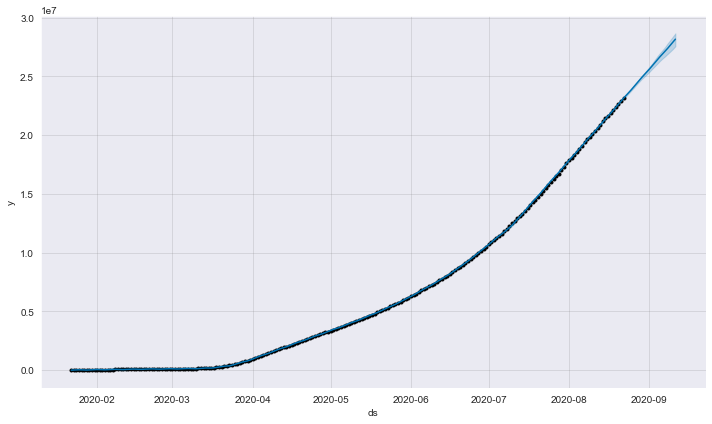

In [61]:
sns.set_style('darkgrid')
print(prophet_model.plot(confirmed_forecast))

Figure(648x648)


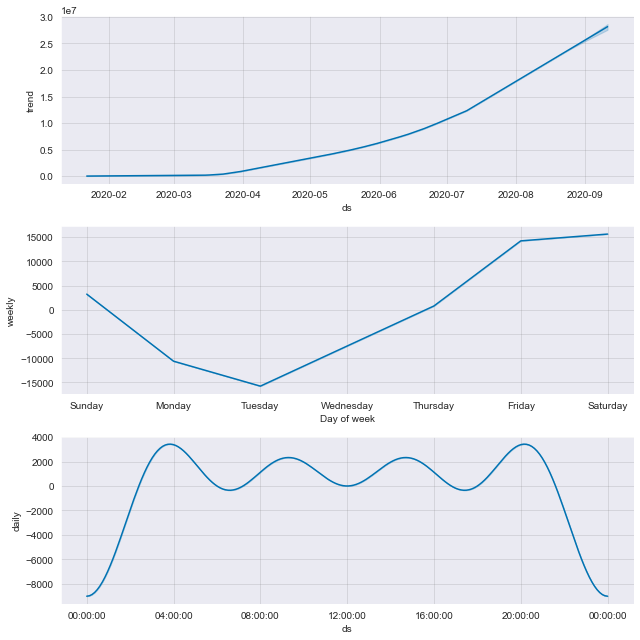

In [62]:
print(prophet_model.plot_components(confirmed_forecast))


In [63]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(covid_datewise ["Confirmed"],confirmed_forecast['yhat'].head(covid_datewise.shape[0])))
print("Root Mean Squared Error for Prophet Model: ",np.sqrt(mean_squared_error(covid_datewise["Confirmed"],confirmed_forecast['yhat'].head(covid_datewise.shape[0]))))

Root Mean Squared Error for Prophet Model:  33812.59902275105


In [64]:
india_Confirmed.columns=['ds','y']
india_Confirmed['ds']=pd.to_datetime(india_Confirmed['ds'])

In [65]:
m=Prophet()
m.fit(india_Confirmed)
future=m.make_future_dataframe(periods=20)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [66]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(20)

,ds,yhat,yhat_lower,yhat_upper
206,2020-08-23,2.955712e+06,2.912217e+06,3.001604e+06
207,2020-08-24,3.006596e+06,2.963110e+06,3.051488e+06
208,2020-08-25,3.056295e+06,3.016969e+06,3.096180e+06
209,2020-08-26,3.110020e+06,3.070201e+06,3.158310e+06
210,2020-08-27,3.163386e+06,3.119923e+06,3.209263e+06
211,2020-08-28,3.216315e+06,3.171303e+06,3.260058e+06
212,2020-08-29,3.269832e+06,3.226771e+06,3.315252e+06
213,2020-08-30,3.316649e+06,3.271870e+06,3.359809e+06
214,2020-08-31,3.367533e+06,3.320934e+06,3.417625e+06
215,2020-09-01,3.417232e+06,3.363421e+06,3.462202e+06


In [68]:
sns.set_style('darkgrid')
india_Confirmed['ds']=pd.to_datetime(india_Confirmed['ds'])

Figure(720x432)


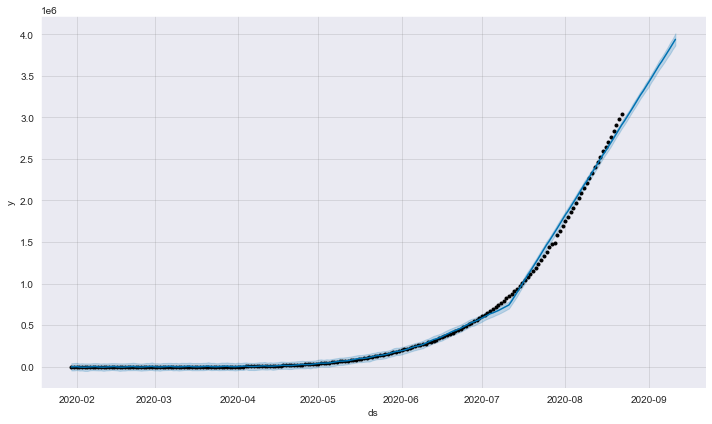

In [69]:
print(m.plot(forecast))

Figure(648x432)


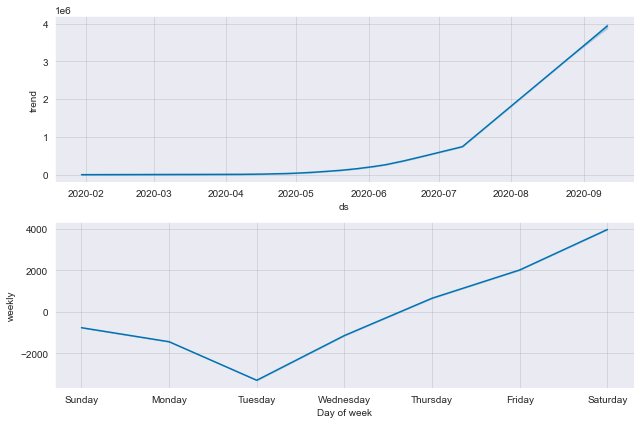

In [70]:
print(m.plot_components(forecast))

In [71]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(df_india ["Confirmed"],forecast['yhat'].head(df_india.shape[0])))
print(" Mean Squared Error for Prophet Model: ",np.sqrt(mean_squared_error(df_india["Confirmed"],forecast['yhat'].head(df_india.shape[0]))))

 Mean Squared Error for Prophet Model:  34046.02606080462
